In [ ]:

!pip3 install keras==2.3.1

In [3]:
from tensorflow.keras.applications.vgg19 import VGG19
model = VGG19()

In [60]:
!pip3 install numba

     |████████████████████████████████| 2.1 MB 542 kB/s eta 0:00:01
     |████████████████████████████████| 18.5 MB 4.2 MB/s eta 0:00:01
  Created wheel for numba: filename=numba-0.52.0-cp37-cp37m-macosx_10_13_x86_64.whl size=2185016 sha256=af403f6dddf8c79553ebf811b9e99da24eb87acea1167acbdd2ac03c4f2d1b43
  Stored in directory: /Users/mac/Library/Caches/pip/wheels/36/0b/e3/7309ad825d1bc2e7e8e0c1893a68f9318c34a4ea678d86989b
Successfully built numba
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
phik 0.11.0 requires joblib>=0.14.1, which is not installed.
pandas-profiling 2.10.0 requires joblib, which is not installed.


In [5]:
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [6]:
#완전분류기를 제거한 모델
model = VGG19(weights='imagenet', include_top = False, input_shape= (224,224,3))

In [7]:
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [2]:
from keras.preprocessing import image

Using TensorFlow backend.


In [157]:
target = image.load_img('imagenet/ILSVRC2012_val_00000028.JPEG',target_size = (224,224))

In [158]:
import os
file_list = os.listdir("imagenet")
file_list.remove('.DS_Store')
file_list

['ILSVRC2012_val_00000009.JPEG',
 'ILSVRC2012_val_00000459.JPEG',
 'ILSVRC2012_val_00000635.JPEG',
 'ILSVRC2012_val_00000265.JPEG',
 'ILSVRC2012_val_00000770.JPEG',
 'ILSVRC2012_val_00000320.JPEG',
 'ILSVRC2012_val_00000818.JPEG',
 'ILSVRC2012_val_00000232.JPEG',
 'ILSVRC2012_val_00000398.JPEG',
 'ILSVRC2012_val_00000662.JPEG',
 'ILSVRC2012_val_00000377.JPEG',
 'ILSVRC2012_val_00000727.JPEG',
 'ILSVRC2012_val_00000048.JPEG',
 'ILSVRC2012_val_00000418.JPEG',
 'ILSVRC2012_val_00000674.JPEG',
 'ILSVRC2012_val_00000224.JPEG',
 'ILSVRC2012_val_00000731.JPEG',
 'ILSVRC2012_val_00000361.JPEG',
 'ILSVRC2012_val_00000859.JPEG',
 'ILSVRC2012_val_00000789.JPEG',
 'ILSVRC2012_val_00000273.JPEG',
 'ILSVRC2012_val_00000623.JPEG',
 'ILSVRC2012_val_00000336.JPEG',
 'ILSVRC2012_val_00000766.JPEG',
 'ILSVRC2012_val_00000988.JPEG',
 'ILSVRC2012_val_00000822.JPEG',
 'ILSVRC2012_val_00000571.JPEG',
 'ILSVRC2012_val_00000121.JPEG',
 'ILSVRC2012_val_00000434.JPEG',
 'ILSVRC2012_val_00000064.JPEG',
 'ILSVRC20

In [159]:
imglist = []
for i in range(1000) :
    imglist.append(image.load_img('imagenet/'+file_list[i],target_size=(224,224)))
    
origin_imglist = imglist[:]

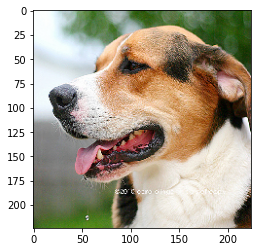

In [160]:
import matplotlib.pyplot as plt
plt.imshow(target)
plt.show()

In [161]:
#케라스에서 작업하기 위해서는 픽셀을 NumPy배열로 반환해야한다.

from keras.preprocessing.image import img_to_array
target = img_to_array(target)

for i in range(1000) :
    imglist[i] = img_to_array(imglist[i])

In [162]:
#네트워크는 하나 이상의 입력을 기대한다. 입력 배열은 Samples,rows,columns,channels가 되어야 하므로 차원을 추가한다.
target = target.reshape((1,target.shape[0],target.shape[1],target.shape[2]))

for i in range(1000) :
    imglist[i] = imglist[i].reshape((1,imglist[i].shape[0],imglist[i].shape[1],imglist[i].shape[2]))

In [163]:
#코사인 유사도 구하는 함수 - 연산속도가 오래걸려 numba 를 이용하였다
import numpy as np
from numba import jit

@jit(nopython=True)
def cos_sim(a, b) :
    a_L2 = 0
    b_L2 = 0
    product = 0
    for i in range(7) :
        for j in range(7) :
            for k in range(512) :
                a_L2 += (a[0][i][j][k])**2
                b_L2 += (b[0][i][j][k])**2
                product += a[0][i][j][k] * 1.0 * b[0][i][j][k]

    return product / np.sqrt(a_L2 * b_L2)

In [164]:
#모델에 input 을 넣고 각각의 output을 만든는 과정인데 시간이 많이 소요된다. 이를 해결하기 위한 방법을 찾아야 할 듯
target = model(target)
output_list = []
for i in range(1000) :
    output_list.append(model(imglist[i]))


In [165]:
sim_list = []
cos_sim(target,output_list[35])
for i in range(1000) :
    sim_list.append(cos_sim(target,output_list[i]))

i : 15  sim:  0.40151894700512625
i : 189  sim:  0.34572088434354703
i : 571  sim:  0.37815855094276835
i : 793  sim:  0.36238716434559926
i : 863  sim:  0.3476232942685363
i : 962  sim:  0.3407521295419871


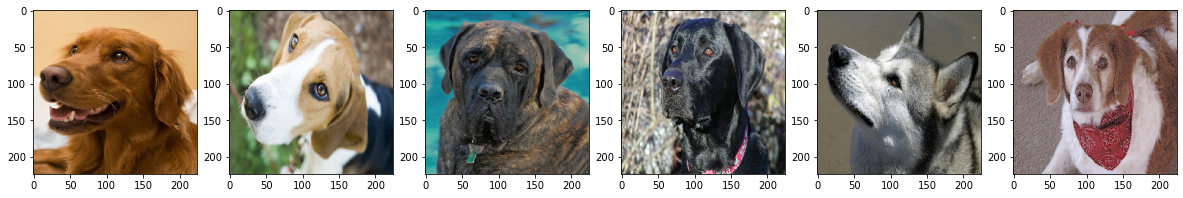

In [173]:
fig = plt.figure(figsize=(24,18))
ax_list = []
num = 0

for i in range(1000) :
    if sim_list[i] > 0.3 and sim_list[i] < 1 :
        print("i :",i," sim: ",sim_list[i])
        num+=1
        ax_list.append(fig.add_subplot(1,7,num))
        ax_list[num-1].imshow(origin_imglist[i])
        
        


In [ ]:
#ImageNet 훈련데이터와 마찬가지로 이미지 픽셀이 준비되어야 하는데, 이는 전처리를 해야한다는 것이다
#여기서 필요한 전처리는 각각의 픽셀로부터 훈련데이터셋에서 계산된 평균 RGB값을 추출하는 것이다
#이를 위해 preprocss_input() 함수를 제공한다

from keras.applications.vgg16 import preprocess_input
target= preprocess_input(target)

for i in range(1000) :
    imglist[i] = preprocess_input(imglist[i])